In [3]:
%matplotlib inline


# Using geometric transformations


In this example, we will see how to use geometric transformations in the context
of image processing.



In [10]:
import math
import numpy as np
import matplotlib.pyplot as plt

from skimage import data
from skimage import transform as tf

Basics
======

Several different geometric transformation types are supported: similarity,
affine, projective and polynomial.

Geometric transformations can either be created using the explicit
parameters (e.g. scale, shear, rotation and translation) or the
transformation matrix:

First we create a transformation using explicit parameters:



In [11]:
tform = tf.SimilarityTransform(scale=1, rotation=math.pi/2,
                               translation=(0, 1))
print(tform.params)

[[ 6.123234e-17 -1.000000e+00  0.000000e+00]
 [ 1.000000e+00  6.123234e-17  1.000000e+00]
 [ 0.000000e+00  0.000000e+00  1.000000e+00]]


Alternatively you can define a transformation by the transformation matrix
itself:



In [12]:
matrix = tform.params.copy()
matrix[1, 2] = 2
tform2 = tf.SimilarityTransform(matrix)

These transformation objects can then be used to apply forward and inverse
coordinate transformations between the source and destination coordinate
systems:



In [6]:
coord = [1, 0]
print(tform2(coord))
print(tform2.inverse(tform(coord)))

NameError: name 'tform2' is not defined

Image warping
=============

Geometric transformations can also be used to warp images:



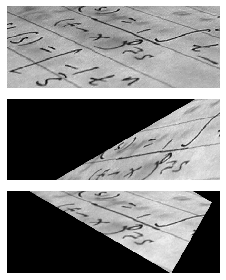

In [25]:
import math
import numpy as np
import matplotlib.pyplot as plt

from skimage import data
from skimage import transform as tf
text = data.text()

tform = tf.SimilarityTransform(scale=1, rotation=math.pi/6,
                               translation=(text.shape[0]/4, -200))
rotated = tf.warp(text, tform)
back_rotated = tf.warp(rotated, tform.inverse)

fig, ax = plt.subplots(nrows=3)

ax[0].imshow(text, cmap=plt.cm.gray)
ax[1].imshow(rotated, cmap=plt.cm.gray)
ax[2].imshow(back_rotated, cmap=plt.cm.gray)
for a in ax:
    a.axis('off')

plt.tight_layout()

Parameter estimation
====================

In addition to the basic functionality mentioned above you can also
estimate the parameters of a geometric transformation using the least-
squares method.

This can amongst other things be used for image registration or
rectification, where you have a set of control points or
homologous/corresponding points in two images.

Let's assume we want to recognize letters on a photograph which was not
taken from the front but at a certain angle. In the simplest case of a
plane paper surface the letters are projectively distorted. Simple matching
algorithms would not be able to match such symbols. One solution to this
problem would be to warp the image so that the distortion is removed and
then apply a matching algorithm:



In [ ]:
text = data.text()

src = np.array([[0, 0], [0, 50], [300, 50], [300, 0]])
dst = np.array([[155, 15], [65, 40], [260, 130], [360, 95]])

tform3 = tf.ProjectiveTransform()
tform3.estimate(src, dst)
warped = tf.warp(text, tform3, output_shape=(50, 300))

fig, ax = plt.subplots(nrows=2, figsize=(8, 3))

ax[0].imshow(text, cmap=plt.cm.gray)
ax[0].plot(dst[:, 0], dst[:, 1], '.r')
ax[1].imshow(warped, cmap=plt.cm.gray)

for a in ax:
    a.axis('off')

plt.tight_layout()

plt.show()